In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
allAcc = pd.read_csv('accFeatures.csv')
allAcc = allAcc.iloc[:, 1:]
allAcc.head()

,boro_ct201,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,class1,class2,class3,dayOfWeek,time,st_width,bike_lane,outcome
0,5000900,0.0,0.0,sedan,sedan,NaN,2,16,28.818182,7.0,non-fatal
1,5000900,0.0,0.0,NaN,NaN,NaN,1,15,28.818182,7.0,non-fatal
2,5000900,0.0,0.0,suv,NaN,NaN,0,9,28.818182,7.0,non-fatal
3,5000900,0.0,0.0,NaN,NaN,NaN,6,13,28.818182,7.0,non-fatal
4,5000900,0.0,0.0,NaN,suv,NaN,2,18,28.818182,7.0,non-fatal


In [3]:
ctComplexity = gpd.read_file('ctComplexity/ctComplex.shp')
ctComplexity.head()

,boro_ct201,complexity,geometry
0,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...
1,1009800,10.999992,POLYGON ((-73.96432543478758 40.75638153099091...
2,1010000,13.000007,POLYGON ((-73.96802436915851 40.75957814005282...
3,1010200,16.000009,POLYGON ((-73.97124277307127 40.76093641847906...
4,1010400,7.000118,POLYGON ((-73.97445730550224 40.76229308352487...


In [4]:
allFeat = ctComplexity.merge(allAcc, on='boro_ct201')
allFeat.head()

,boro_ct201,complexity,geometry,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,class1,class2,class3,dayOfWeek,time,st_width,bike_lane,outcome
0,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,sedan,sedan,NaN,2,16,28.818182,7.0,non-fatal
1,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,NaN,NaN,NaN,1,15,28.818182,7.0,non-fatal
2,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,suv,NaN,NaN,0,9,28.818182,7.0,non-fatal
3,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,NaN,NaN,NaN,6,13,28.818182,7.0,non-fatal
4,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,NaN,suv,NaN,2,18,28.818182,7.0,non-fatal


In [5]:
outcome = []

for i in range(len(allFeat)):

    if allFeat.outcome.values[i] == 'fatal':
        outcome.append(1)
    else:
        outcome.append(0)
        
allFeat['outcome'] = outcome
allFeat.head()

,boro_ct201,complexity,geometry,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,class1,class2,class3,dayOfWeek,time,st_width,bike_lane,outcome
0,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,sedan,sedan,NaN,2,16,28.818182,7.0,0
1,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,NaN,NaN,NaN,1,15,28.818182,7.0,0
2,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,suv,NaN,NaN,0,9,28.818182,7.0,0
3,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,NaN,NaN,NaN,6,13,28.818182,7.0,0
4,5000900,9.533045,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,NaN,suv,NaN,2,18,28.818182,7.0,0


In [6]:
allFeat.fillna(value={'class1':'UNK', 'class2':'UNK', 'class3':'UNK'}, inplace=True)

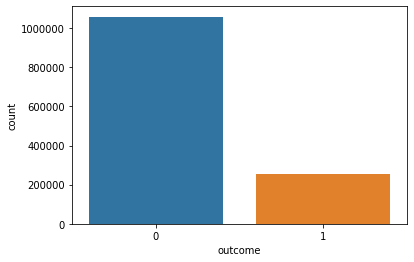

In [7]:
sns.countplot(allFeat.outcome)

In [8]:
print(len(allFeat[allFeat.outcome == 1])/len(allFeat[allFeat.outcome == 0]))

0.23897754821392284


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
logitData = allFeat[['dayOfWeek', 'time', 'st_width', 'bike_lane', 'complexity', 'class1', 'outcome']]
logitData.dropna(inplace=True)

/nfshome/dk3596/.conda/envs/osmnx/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
logitData.shape

(1309812, 7)

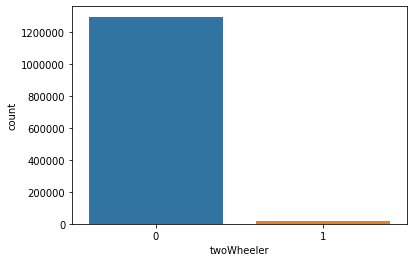

In [12]:
X = logitData[['dayOfWeek', 'time', 'st_width', 'bike_lane', 'complexity', 'class1']]
y = logitData[['outcome']]

temp = pd.get_dummies(X['class1'])
#temp1 = pd.get_dummies(y)
sns.countplot(temp.twoWheeler)

In [13]:
X = X.join(temp)
#y = y.join(temp1)
X = X[['dayOfWeek', 'time', 'st_width', 'bike_lane', 'complexity', 'twoWheeler', 'sedan', 'suv', 'truck']]

In [85]:
X = X[['time', 'st_width', 'bike_lane', 'complexity', 'twoWheeler', 'truck']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2002) 

In [86]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

In [16]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [17]:
clf.score(X_test, y_test)

0.8109908791074555

In [18]:
from sklearn.metrics import roc_curve, auc

In [87]:
pred = clf.predict_proba(X_test)
pred[:, 1]

array([0.19230966, 0.11654858, 0.1870512 , ..., 0.18036586, 0.18528072,
       0.2080731 ])

In [88]:
fpr_1, tpr_1, _ = roc_curve(y_test.values, pred[:, 1])
auc(fpr_1, tpr_1)

0.5398476882303125

Text(0.5, 1.0, 'Receiver operating characteristic')

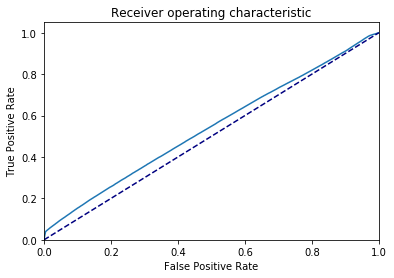

In [22]:
plt.plot(fpr_1, tpr_1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [23]:
X_train.shape

(916868, 6)

In [24]:
rf = RandomForestClassifier(max_depth=10, max_leaf_nodes=200)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/nfshome/dk3596/.conda/envs/osmnx/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/nfshome/dk3596/.conda/envs/osmnx/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8109781546479905

In [25]:
rf.score(X_train, y_train)

0.8112029212492965

In [26]:
rf.feature_importances_

array([0.17795278, 0.06134629, 0.05290481, 0.06477058, 0.61254867,
       0.03047687])

Text(0.5, 1.0, 'Receiver operating characteristic')

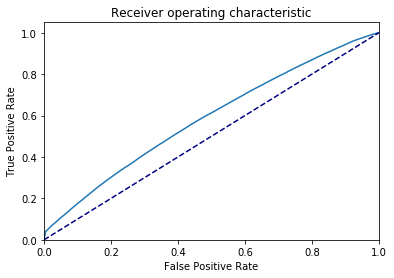

In [28]:
pred = rf.predict_proba(X_test)
fpr_1, tpr_1, _ = roc_curve(y_test.values, pred[:, 1])
plt.plot(fpr_1, tpr_1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [29]:
auc(fpr_1, tpr_1)

0.5851033824548533

In [81]:
aucScores = []

for i in range(1, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train, y_train)
    pred = rf.predict_proba(X_test)
    fpr_1, tpr_1, _ = roc_curve(y_test.values, pred[:, 1])
    aucScores.append(auc(fpr_1, tpr_1))
    
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


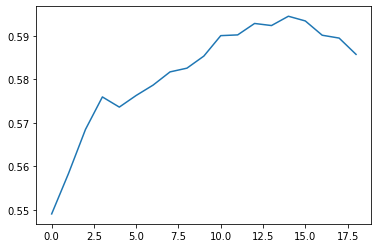

In [82]:
plt.plot(aucScores)

In [33]:
from xgboost import XGBClassifier

In [72]:
xb = XGBClassifier(max_depth=9)
xb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Text(0.5, 1.0, 'Receiver operating characteristic')

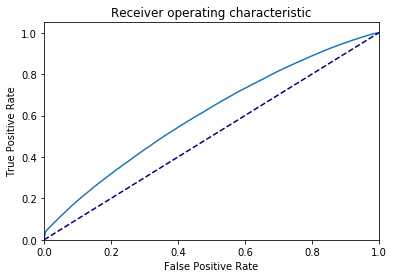

In [73]:
pred = xb.predict_proba(X_test)
fpr_1, tpr_1, _ = roc_curve(y_test.values, pred[:, 1])
plt.plot(fpr_1, tpr_1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [74]:
auc(fpr_1, tpr_1)

0.6040116804885999

In [ ]:
aucScores = []

for i in range(1, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i) 
    xb = XGBClassifier(max_depth=i)
    xb.fit(X_train, y_train)
    pred = xb.predict_proba(X_test)
    fpr_1, tpr_1, _ = roc_curve(y_test.values, pred[:, 1])
    aucScores.append(auc(fpr_1, tpr_1))
    
    print(i)

1
2
3
4
5
6
7
8
9
10
11


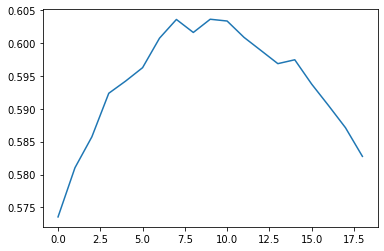

In [84]:
plt.plot(aucScores)

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0.5, 1.0, 'Receiver operating characteristic')

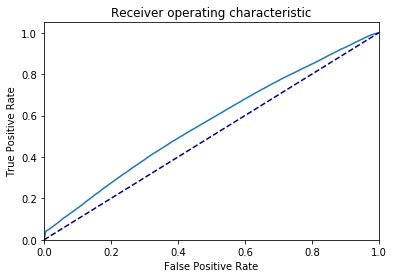

In [63]:
pred = nb.predict_proba(X_test)
fpr_1, tpr_1, _ = roc_curve(y_test.values, pred[:, 1])
plt.plot(fpr_1, tpr_1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [65]:
auc(fpr_1, tpr_1)

0.5642463345587019

In [125]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [95]:
X.shape[1]

6

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

standardization = StandardScaler()
X_train = standardization.fit_transform(X_train)
X_test = standardization.transform(X_test)


In [144]:
model = Sequential()
model.add(Dense(256, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(512, kernel_initializer='normal',activation='relu'))
model.add(Dense(512, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [146]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split = 0.2)

Train on 733494 samples, validate on 183374 samples
Epoch 1/10
733494/733494 [==============================] - 48s 65us/step - loss: 0.4812 - acc: 0.8107 - val_loss: 0.4811 - val_acc: 0.8106
Epoch 2/10
733494/733494 [==============================] - 47s 64us/step - loss: 0.4810 - acc: 0.8107 - val_loss: 0.4810 - val_acc: 0.8106
Epoch 3/10
733494/733494 [==============================] - 47s 65us/step - loss: 0.4809 - acc: 0.8107 - val_loss: 0.4808 - val_acc: 0.8106
Epoch 4/10
733494/733494 [==============================] - 47s 64us/step - loss: 0.4808 - acc: 0.8107 - val_loss: 0.4813 - val_acc: 0.8106
Epoch 5/10
733494/733494 [==============================] - 47s 64us/step - loss: 0.4807 - acc: 0.8107 - val_loss: 0.4809 - val_acc: 0.8106
Epoch 6/10
733494/733494 [==============================] - 48s 65us/step - loss: 0.4806 - acc: 0.8107 - val_loss: 0.4810 - val_acc: 0.8106
Epoch 7/10
733494/733494 [==============================] - 47s 64us/step - loss: 0.4805 - acc: 0.8107 - val

In [147]:
pred = model.predict(X_test)

In [148]:
fpr_1, tpr_1, _ = roc_curve(y_test.values, pred)

Text(0.5, 1.0, 'Receiver operating characteristic')

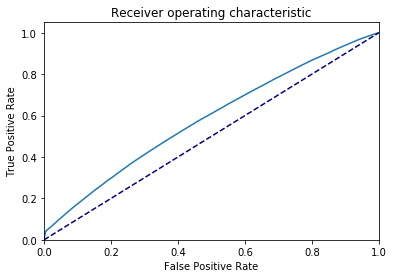

In [149]:
plt.plot(fpr_1, tpr_1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [150]:
auc(fpr_1, tpr_1)

0.5824442789740168